In [ ]:
#TASK - 1
#TITANIC SURVIVAL


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
data = pd.read_csv('/content/tested.csv')
print(data.head())
print(data.info())



   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (

In [ ]:
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])



In [ ]:
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [ ]:
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

In [ ]:
x=data.drop("Survived",axis=1)
y=data['Survived']

In [ ]:
X_train, X_test ,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
#train the model
model = RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
#make the predictions
y_pred = model.predict(X_test)

In [ ]:
#evaluate the model
print("Accuracy:",accuracy_score(y_test,y_pred))
print("classficiation Report:\n",classification_report(y_test,y_pred))

Accuracy: 1.0
classficiation Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



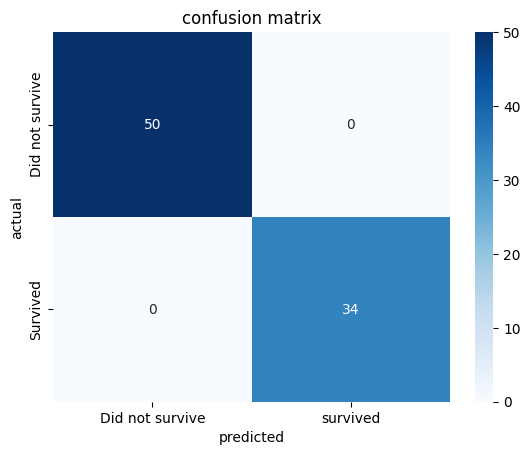

In [ ]:
conf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix,annot=True, fmt= 'd' ,cmap='Blues',xticklabels=['Did not survive','survived'], yticklabels=['Did not survive', 'Survived'])
plt.title('confusion matrix')
plt.xlabel('predicted')
plt.ylabel("actual")
plt.show()


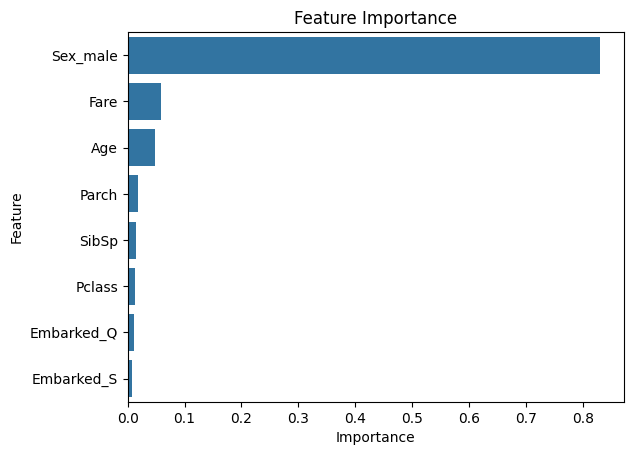

In [ ]:
importances = pd.DataFrame({'Feature': x.columns, 'Importance':model.feature_importances_})
importances = importances.sort_values(by='Importance',ascending=False)
sns.barplot(x="Importance",y='Feature',data=importances)
plt.title('Feature Importance')
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()




# import shutil
# shutil.copy('/mnt/data/species_image.zip', '/content/species_image.zip')

# !unzip /content/species_image.zip -d /content/species_image/



Saving species_image.zip to species_image.zip


In [ ]:
!ls


sample_data  species_image.zip	unemployement.zip


In [ ]:
!unzip species_image.zip -d /content/species_image/


Archive:  species_image.zip
   creating: /content/species_image/species_image/
  inflating: /content/species_image/species_image/IrisS.jpg  
  inflating: /content/species_image/species_image/IrisV.jpg  
  inflating: /content/species_image/species_image/IrisVi.jpg  


In [ ]:
!ls /content/species_image/


species_image


In [ ]:
#TASK - 2
# IRIS FLOWER CLASSIFICATION



import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

image_directory = '/content/species_image/species_image'


species_to_image = {
    'Iris-setosa': '/content/species_image/species_image/IrisS.jpg',
    'Iris-versicolor': '/content/species_image/species_image/IrisV.jpg',
    'Iris-virginica': '/content/species_image/species_image/IrisVi.jpg'
}

data = pd.read_csv("/content/Iris.csv")
print(data.head())


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [ ]:
print(data['Species'].value_counts())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [ ]:
data = data.rename(columns={'SepalLengthCm' : 'Sepallength','SepalWidthCm' : 'Sepalwidth','PetalLengthCm' : 'Petallength', 'PetalWidthCm': 'PetalWidth'})
print(data.head())

   Id  Sepallength  Sepalwidth  Petallength  PetalWidth      Species
0   1          5.1         3.5          1.4         0.2  Iris-setosa
1   2          4.9         3.0          1.4         0.2  Iris-setosa
2   3          4.7         3.2          1.3         0.2  Iris-setosa
3   4          4.6         3.1          1.5         0.2  Iris-setosa
4   5          5.0         3.6          1.4         0.2  Iris-setosa


In [ ]:
# slicing
X = data.iloc[: ,1:-1].values
y = data.iloc[:,-1].values

from sklearn.preprocessing import LabelEncoder

label_encoder=LabelEncoder()
y = label_encoder.fit_transform(y)
# Train the dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%\n")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Accuracy: 100.00%

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [ ]:
##### print("\nEnter the following features of the flowers")
sepal_length = float(input("Sepallength : "))
sepal_width = float(input("Sepalwidth : "))
petal_length = float(input("Petallength : "))
petal_width = float(input("Petalwidth : "))

#Iris-setosa = 5.1 , 3.5 , 1.4 . 0.2
#Iris-versicolor = 7.0, 3.2, 4.7 , 1.4
#Iris - virginica = 6.3 , 3.3 , 6.0 , 2.5

Sepallength : 6.3
Sepalwidth : 3.3
Petallength : 6.0
Petalwidth : 2.5



Predicted Species: Iris-virginica


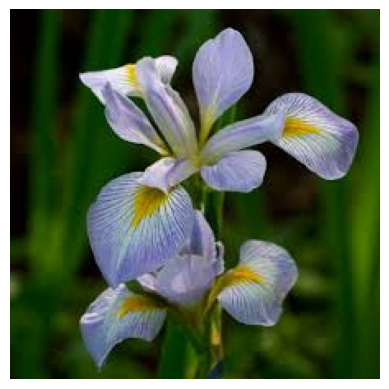

In [ ]:


import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Example: User input for prediction
user_input = [[sepal_length, sepal_width, petal_length, petal_width]]

# Predict the species using the trained model
predicted_class = model.predict(user_input)
predicted_species = label_encoder.inverse_transform(predicted_class)

print(f"\nPredicted Species: {predicted_species[0]}")

# Construct the image path safely
image_path = os.path.join(image_directory, species_to_image.get(predicted_species[0], ''))

# Check if the file exists
if os.path.exists(image_path):
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.show()
else:
    print(f"Error: File not found - {image_path}")






In [ ]:
#TASK - 3
# UNEMPLOYEMENT


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving unemployement.zip to unemployement (1).zip


In [ ]:
!ls

'archive (12).zip'   IrisS.jpg	  IrisV.jpg     species_image		 unemployement.zip
 Iris.csv	     IrisVi.jpg   sample_data  'species_image (1).zip'


In [ ]:
!unzip /content/unemployement.zip -d /content/unzipped/


Archive:  /content/unemployement.zip
  inflating: /content/unzipped/Unemployment in India.csv  
  inflating: /content/unzipped/Unemployment_Rate_upto_11_2020.csv  


In [ ]:
!ls /content/unzipped/


'Unemployment in India.csv'   Unemployment_Rate_upto_11_2020.csv


In [ ]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file1 = '/content/unzipped/Unemployment in India.csv'
file2 ='/content/unzipped/Unemployment_Rate_upto_11_2020.csv'

In [ ]:
!head /content/unzipped/Unemployment\ in\ India.csv


﻿Region, Date, Frequency, Estimated Unemployment Rate (%), Estimated Employed, Estimated Labour Participation Rate (%),Area
Andhra Pradesh, 31-05-2019, Monthly, 3.65, 11999139.00, 43.24,Rural
Andhra Pradesh, 30-06-2019, Monthly, 3.05, 11755881.00, 42.05,Rural
Andhra Pradesh, 31-07-2019, Monthly, 3.75, 12086707.00, 43.50,Rural
Andhra Pradesh, 31-08-2019, Monthly, 3.32, 12285693.00, 43.97,Rural
Andhra Pradesh, 30-09-2019, Monthly, 5.17, 12256762.00, 44.68,Rural
Andhra Pradesh, 31-10-2019, Monthly, 3.52, 12017412.00, 43.01,Rural
Andhra Pradesh, 30-11-2019, Monthly, 4.12, 11397681.00, 41.00,Rural
Andhra Pradesh, 31-12-2019, Monthly, 4.38, 12528395.00, 45.14,Rural
Andhra Pradesh, 31-01-2020, Monthly, 4.84, 12016676.00, 43.46,Rural


In [ ]:
data1 = pd.read_csv(file1)
data2 = pd.read_csv(file2)

In [ ]:
# Display the first few rows of both datasets
print("Dataset 1 Preview:")
print(data1.head())
print("\nDataset 2 Preview:")
print(data2.head())

Dataset 1 Preview:
           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  

Dataset 2 Preview:
           Region         Date  Frequency 

In [ ]:
# Check for missing values in both datasets
print("\nMissing Values in Dataset 1:")
print(data1.isnull().sum())
print("\nMissing Values in Dataset 2:")
print(data2.isnull().sum())


Missing Values in Dataset 1:
Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

Missing Values in Dataset 2:
Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64


In [ ]:
# Dataset statistics
print("\nStatistics for Dataset 1:")
print(data1.describe())
print("\nStatistics for Dataset 2:")
print(data2.describe())


Statistics for Dataset 1:
       Estimated Unemployment Rate (%)  Estimated Employed  \
count                       740.000000        7.400000e+02   
mean                         11.787946        7.204460e+06   
std                          10.721298        8.087988e+06   
min                           0.000000        4.942000e+04   
25%                           4.657500        1.190404e+06   
50%                           8.350000        4.744178e+06   
75%                          15.887500        1.127549e+07   
max                          76.740000        4.577751e+07   

       Estimated Labour Participation Rate (%)  
count                               740.000000  
mean                                 42.630122  
std                                   8.111094  
min                                  13.330000  
25%                                  38.062500  
50%                                  41.160000  
75%                                  45.505000  
max                   

In [ ]:
if 'Region' in data2.columns and 'Date' in data2.columns and 'Unemployment Rate' in data2.columns:
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=data2, x='Date', y='Unemployment Rate', hue='Region', marker='o')
    plt.title('Unemployment Rate Over Time (by Region)')
    plt.xlabel('Date')
    plt.ylabel('Unemployment Rate (%)')
    plt.xticks(rotation=45)
    plt.grid()
    plt.tight_layout()
    plt.legend(title='Region')
    plt.show()

In [ ]:
# Distribution of unemployment rate (from the first dataset)
if 'Unemployment Rate' in data1.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data1['Unemployment Rate'], kde=True, bins=20, color='blue')
    plt.title('Distribution of Unemployment Rate')
    plt.xlabel('Unemployment Rate (%)')
    plt.ylabel('Frequency')
    plt.grid()
    plt.tight_layout()
    plt.show()

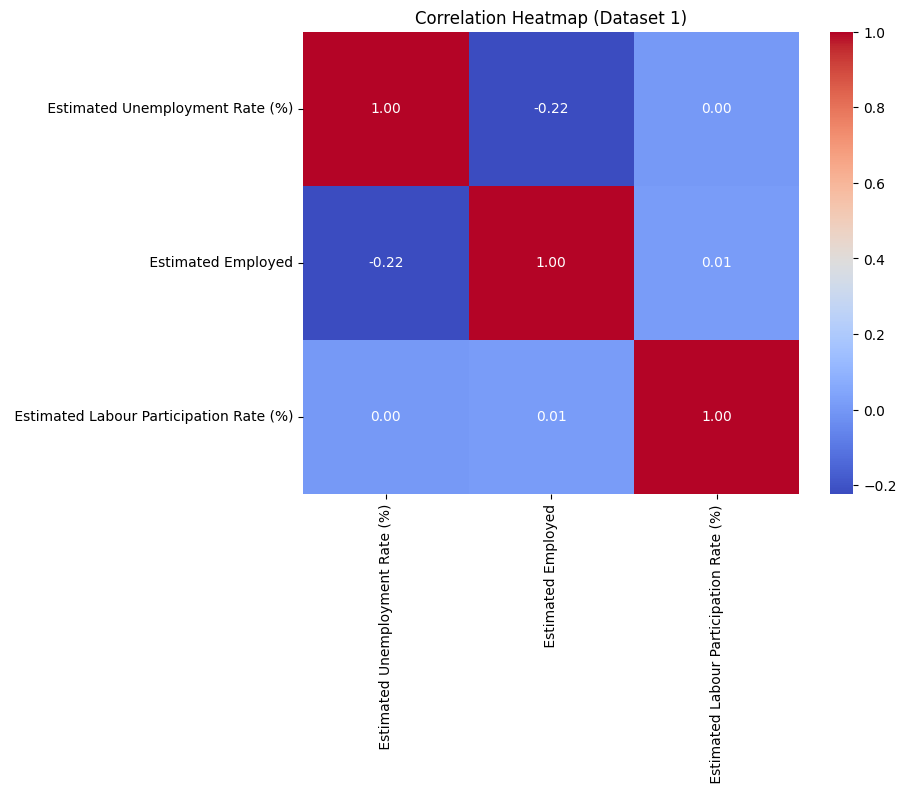

In [ ]:
# Select only numeric columns for correlation
numeric_data1 = data1.select_dtypes(include=['number'])

# Check if there are any numeric columns
if not numeric_data1.empty:
    plt.figure(figsize=(8, 6))
    sns.heatmap(numeric_data1.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap (Dataset 1)')
    plt.show()
else:
    print("Dataset 1 does not have numeric columns for correlation.")


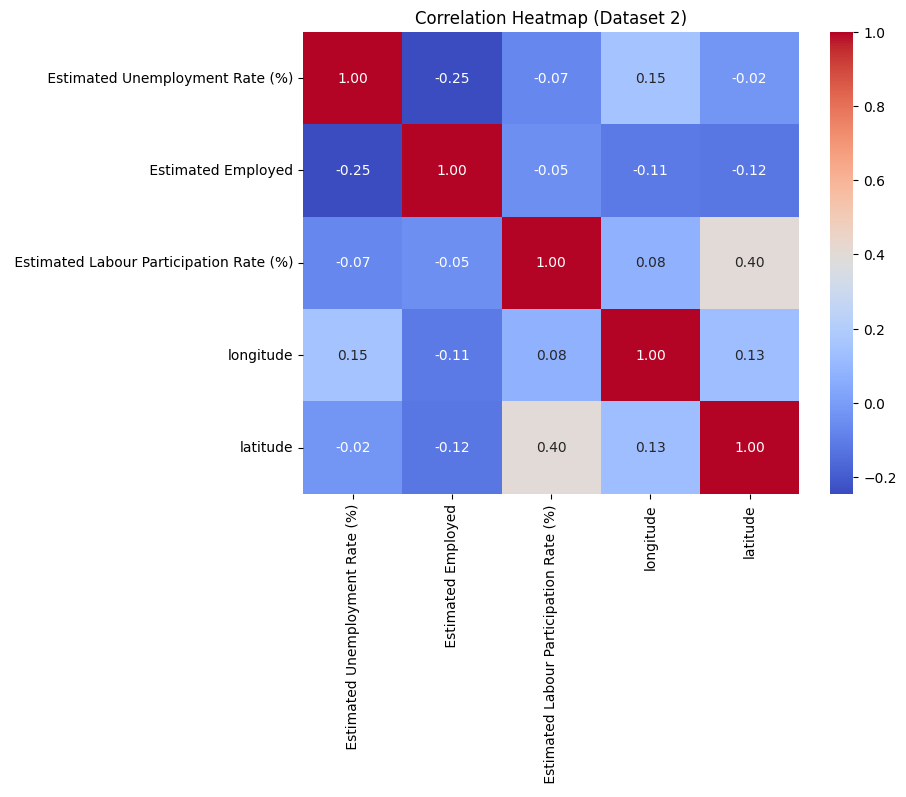

In [ ]:
# Select only numeric columns for correlation
numeric_data2 = data2.select_dtypes(include=['number'])

if not numeric_data2.empty:
    plt.figure(figsize=(8, 6))
    sns.heatmap(numeric_data2.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap (Dataset 2)')
    plt.show()